# 최종보고서

### 2017110270 컴퓨터공학과 김유민

### (1) 주제 선정 이유

 평소 집 근처 장소 중 휴양 및 정서 생활로써 가성비 있는 곳으로 한강이 제격이라 생각했다. 한강은 서울시의 명소 중 공공장소로 일반 이용자가 언제든지 드나들 수 있는 장소이다. 한강 일대를 어떻게 관리하고 운영 방식을 취하느냐에 따라 서울시 이미지에 중요한 역할을 보탤 수 있고 경제적효과 등을 고려해 볼 수도 있다. 따라서 한강 공원 이용자에 관한 데이터를 통해 앞으로 한강 공원 개선 방향을 정할 수도 있을 것이다.  
 서울시 곳곳을 뻗쳐 나가는 한강공원 일대를 현대인들에게 가장 잘 어필 할 수 있는 수단 중 하나는 바로 sns이다. sns에 특정 장소가 홍보가 되거나 이미지 향상을 위해서는 해당 로케이션 뷰가 매우 중요한데 이에는 한강 공원의 주 요소인 운동시설, 자전거 이용, 중요행사 및 마라톤, 특화공원 그리고 기타 중 특화공원이 가장 크게 작용할 것이라 예상한다. 따라서 이러한 예상 및 가설이 타당한지를 증명하기 위해 이번 term project 주제로 선정하게 되었다.

### (2) 가설정의

한강 공원 이용에 특화공원의 유무가 홍보 수단에 중요한 역할일 것이다. 
=> 특화공원이 있는 지역의 한강 공원일 수록 sns에 자주 언급되어 홍보가 잘 된다.


1. 홍보 수단 기준: 인스타그램 해시태그


2.  지역 중 특화공원 (유): 뚝섬, 반포, 여의도, 난지<br> 지역 중 특화공원 (무): 잠실, 잠원, 이촌, 양화, 망원, 강서 


3. 특화공원 기준: 수상무대, 서울색공원, 음악분수, 갈대숲탐방로, 세빛섬 등 포함<br>기타 : 전망쉼터, 캠핑장, 눈썰매장, 수영장/물놀이장 등 


4. 기간: 2016

### (3) 명제/논리을 펼치기 위하여, 인터넷을 통한 데이터 획득

서울시 한강공원 이용객 현황 통계 - 서울열린데이터 광장 open api 확보
http://data.seoul.go.kr/dataList/datasetView.do?infId=10798&srvType=S&serviceKind=2&currentPageNo=1&searchValue=&searchKey=null

인스타그램 태그 검색 - 파이썬을 통한 인스타그램 open api 분석

크게 위 두 데이터 포맷 수집을 통해 데이터를 획득하게 된다.

#### 1.서울시 한강공원 이용객 데이터 수집

데이터 분석을 위해 pandas 및 BeautifulSoup을 이용하였다.

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
startnumber=1
endnumber=1000
CommerceInfor = {}

항목별로 자료리스트를 정리

In [ ]:
#자료리스트 선언
gigan_list = []           #기간
gubun_list = []           #구분
hapgye_list = []          #합계
ilbaniyongja_list = []    #일반이용자
undongsiseol_list = []    #운동시설
jajeongeo_list = []       #자전거
juyohaengsa_mit_maraton_list = []     #주요행사 및 마라톤
teukhwagongwon_list = []  #특화공원
gita_list = []            #기타

크롤링

In [ ]:
#크롤링
while endnumber<=2000:
    url='http://openapi.seoul.go.kr:8088/616b50587073696d35334b756e7871/xml/octastatapi10798/' + str(startnumber) + '/' + str(endnumber) + '/'
    #인증키 url
    req = requests.get(url)
    html = req.text
    soup = BeautifulSoup(html, 'html.parser') # soup으로 html 파싱
    
    # 해당 태그 찾기
    gigan = soup.find_all('gigan') 
    gubun = soup.find_all('gubun')
    hapgye = soup.find_all('hapgye')
    ilbaniyongja = soup.find_all('ilbaniyongja')
    undongsiseol = soup.find_all('undongsiseol')
    jajeongeo = soup.find_all('jajeongeo')
    juyohaengsa_mit_maraton = soup.find_all('juyohaengsa_mit_maraton')
    teukhwagongwon = soup.find_all('teukhwagongwon')
    gita = soup.find_all('gita')
    
    #자료구조에 삽입 
    for code in gigan:
        gigan_list.append(code.text)
    for code in gubun:
        gubun_list.append(code.text)
    for code in hapgye:
        hapgye_list.append(code.text)
    for code in ilbaniyongja:
        ilbaniyongja_list.append(code.text)
    for code in undongsiseol:
        undongsiseol_list.append(code.text)
    for code in jajeongeo:
        jajeongeo_list.append(code.text)
    for code in juyohaengsa_mit_maraton:
        juyohaengsa_mit_maraton_list.append(code.text)
    for code in teukhwagongwon:
        teukhwagongwon_list.append(code.text)
    for code in gita:
        gita_list.append(code.text)
    
    startnumber+=1000
    endnumber+=1000

자료를 통합

In [ ]:
# 수집한 list들 commerceInfor에 통합
CommerceInfor['기간'] = gigan_list
CommerceInfor['구분'] = gubun_list
CommerceInfor['합계'] = hapgye_list
CommerceInfor['일반이용자'] = ilbaniyongja_list
CommerceInfor['운동시설'] = undongsiseol_list
CommerceInfor['자전거'] = jajeongeo_list
CommerceInfor['중요행사 및 마라톤']= juyohaengsa_mit_maraton_list
CommerceInfor['특화공원'] = teukhwagongwon_list
CommerceInfor['기타'] = gita_list
 
#dictionary를 dataFrame으로 변경
df = pd.DataFrame(CommerceInfor)

#column 순서 정하기
df = df[['기간','구분','합계','일반이용자','운동시설','자전거','중요행사 및 마라톤','특화공원','기타']]

이를 df 결과창으로 실행하면 다음과 같다.

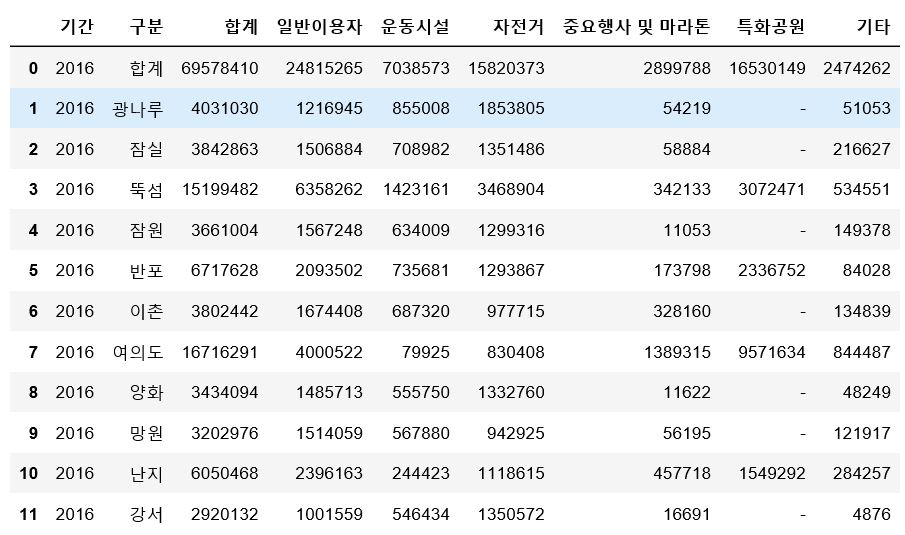

이를 확인하면 2016년 이용객 항목별 현황과 특화공원이 있는 지역은 뚝섬, 반포, 여의도, 난지임을 알 수 있다.






#### 2. 인스타그램을 이용한 sns 분석

지역별로 해시태그 키워드 데이터를 얻고 "한강공원"을 붙였을 때와 아닐때를 비교하여 특화공원이 정말로 영향력이 있는지 확인하고 다른 원인들을 분석한다.<br>

위에서 추출한 gubun 리스트를 바탕으로 해시태그로 검색하여 게시물 개수를 hashnum_list에 저장한다.

In [ ]:
import selenium.webdriver as webdriver	

hashnum_list=[]

for i in range(1,12):
    # 검색할 태그명
    tag = gubun_list[i]

    # 인스타그램 태그 페이지 URL
    url = 'https://www.instagram.com/explore/tags/' + tag 

    options = webdriver.ChromeOptions()	
    options.add_argument('headless')	
    options.add_argument('disable-gpu')	
    driver = webdriver.Chrome('chromedriver_win32/chromedriver.exe', options=options)	
   
    driver.implicitly_wait(5)
    
    driver.get(url)

    # 게시물 개수 정보를 가져온다
    totalCount = driver.find_element_by_class_name('g47SY').text 

    hashnum_list.append(totalCount)
    # 게시물 개수를 출력한다
    print("\"",tag,"\"","해시태그(#) 개수 :", totalCount)	
    
    driver.quit()

print(hashnum_list)

"한강공원"이라는 문구를 추가했을때 게시물 개수도 위와 같은 방법으로 한번 더 데이터를 얻는다.

(7번째 라인을 다음과 같이 수정하여 실행한다.)

In [ ]:
 tag = gubun_list[i] + "한강공원"

결과 창은 다음과 같다.

(1) 지역명 해시태그(#)만 붙였을때

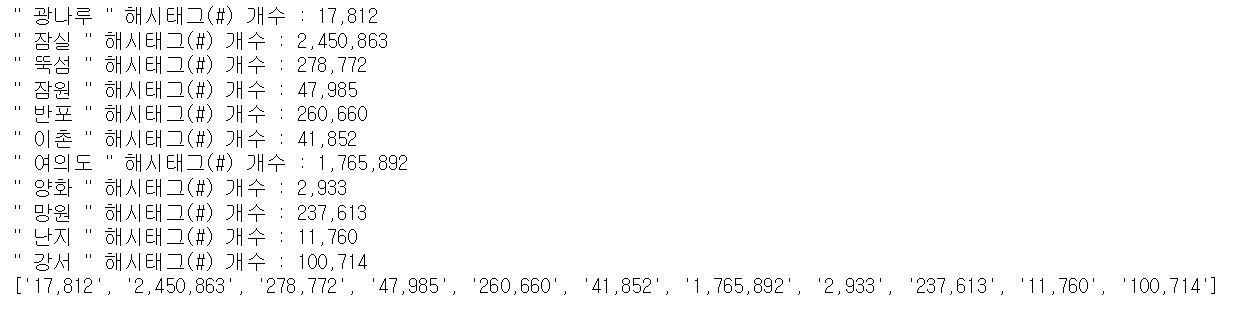

(2) "한강공원"해시태그(#)를 붙였을때

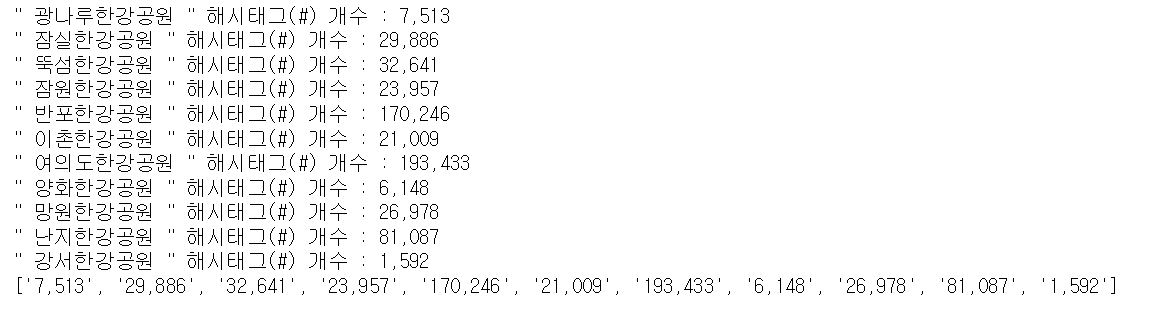

### (4) 분석을 위한 데이터의 가공

 지역별로 특화공원과 그 외의 공원 요소들의 해시태그를 포함시킬 때와 안 시킬 때 대비 sns(인스타그램 해시태그)상 언급 빈도를 분석하고 이것이 서울시 데이터 광장에서 수집한 실제 이용객 현황과 상관관계가 있는지 확인.<br>
해시태그 ex) (#한강/ #한강 + [공원 요소])<br>
이를 데이터 수식화 및 도표를 통해 정리하고 또다른 변수 상황들과 한계에 대해서도 분석한다.



#### 1. 전체 이용객 현황
전체이용객현황을 파이썬 matplotlib 그래프로 표현하면 다음과 같다.

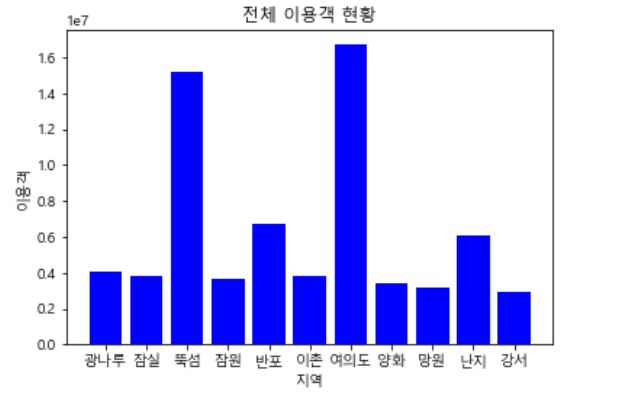

#### 2. 특화공원 pie chart
한강 지역 중 특화공원이 있는 4개 지역(뚝섬,반포,여의도,난지)들의 이용객들의 이용요소 비율을 비교해야한다.

특화공원이 차지하는 비율이 다른 요소들과 비교해 어느정도 되는지 쉽게 확인하기 위해 파이차트를 이용해 분석하였다.

In [ ]:
#한글폰트
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

#Source: https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html
%matplotlib inline
import matplotlib.pyplot as plt

for i in [3,5,7,10]:
    labels = '일반이용자','운동시설','자전거','중요행사 및 마라톤','특화공원','기타'
    sizes = [ilbaniyongja_list[i], undongsiseol_list[i], jajeongeo_list[i], 
             juyohaengsa_mit_maraton_list[i], teukhwagongwon_list[i], gita_list[i]]
    explode = (0, 0, 0, 0, 0.1, 0)  #특화공원

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
    ax1.axis('equal')  

    plt.title(gubun_list[i]) #장소 이름 출력
    plt.show() #그래프 출력 

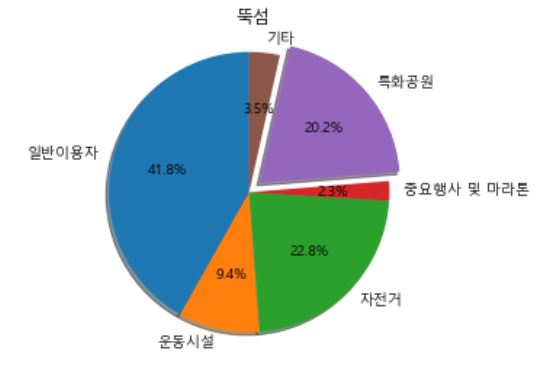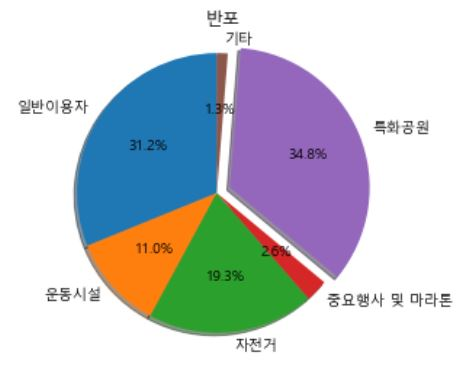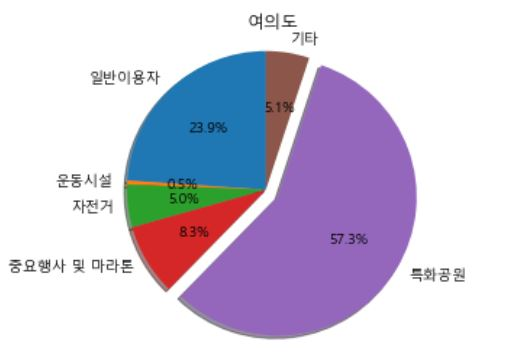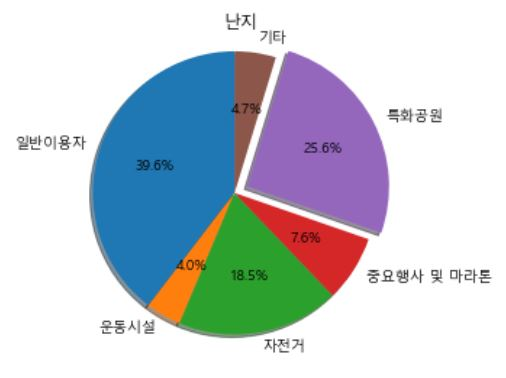

#### 3. 해시태그 게시물 분석

지역별로 한강공원이 실제 지역 sns상 홍보로 영향력을 가지는지 알기 위해 그 지역명만 해시태그로 포함시켰을 때와 "한강공원"을 붙였을 때를 따로 데이터를 추출한다.

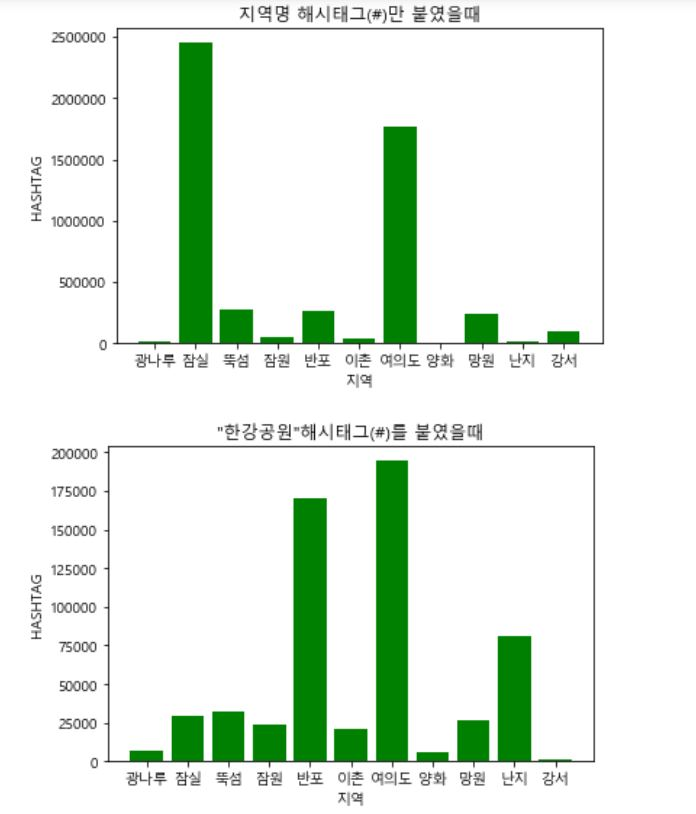

### (5) 분석 결과 도출

#### 1. 가장 많은 이용객이 방문한 지역은 어디인가?(실제 특화공원이 있는 지역들의 특징이 드러나는가?)

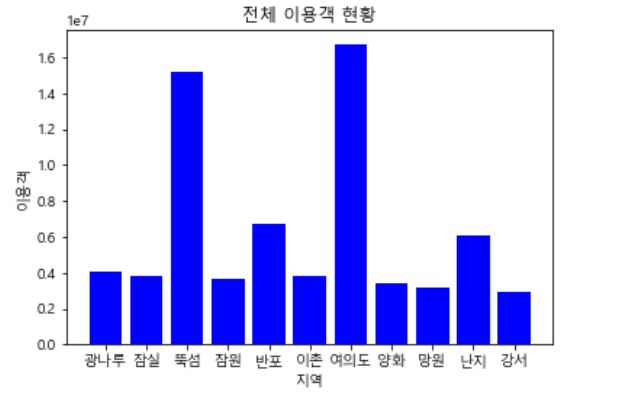

뚝섬,반포, 여의도, 난지 = [15199482, 6717628, 16716291, 6050468]가 상위 4개 지역으로 다른 지역에 비해 월등히 높다.

이 4개지역은 앞서 말했던 특화공원이 있는 지역들로 특화공원이 없는 다른 지역들과 전체 이용객 차이가 확연하다는 것을 알 수 있다.

이를 통해 특화공원의 유무가 이용객 현황에 어느정도 상관관계가 있음을 알 수 있다.

### 2. 특화공원이 정말로 다른 요소들에 비해 영향력이 있는가?

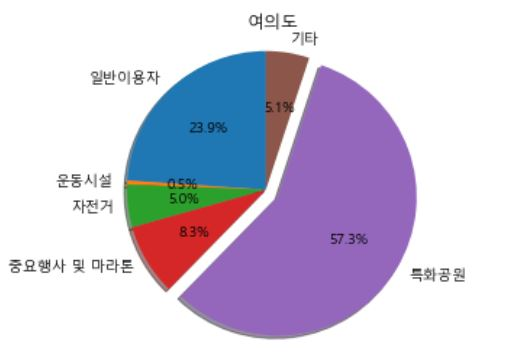

위와 같이 여의도는 전체에서 57.3%가 특화공원에 의한 이용객에 해당된다. 다른 이용객을 합친 수보다 많을 정도로 특화공원 이용객이 차지하는 비율이 월등히 높다.

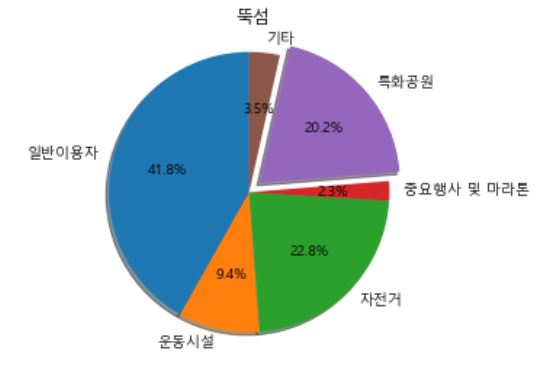

하지만 위와 같이 뚝섬의 경우 특화공원 이용객은 일반이용자, 자전거 다음 순으로 높이 차지한다.꽤 차지 비율이 있는 것은 맞지만 이것이 영의도의 경우처럼 영향력이 크다고 보기는 어렵다.

다른 3지역도 특화공원이 차지하는 비율은 전체에서 2~3위 정도로 상위 비율에 속하나 가장 큰 영향력이 있다고 보기는 어렵다

#### 3. 해시태그 게시물 수는 특화공원 유무와 관련있는가?

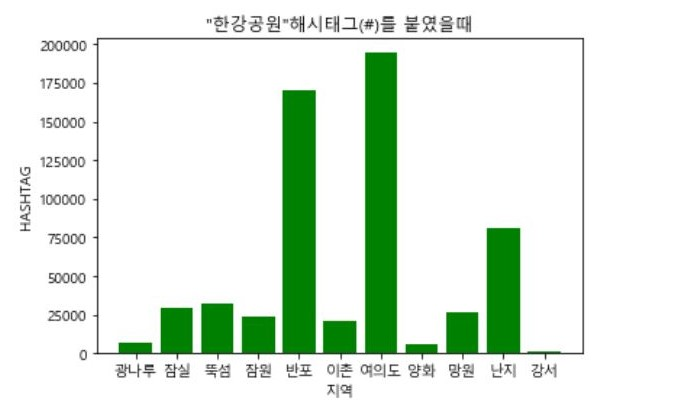

다른 지역에 비해 월등하게 높은 값을 가지는 곳은 반포, 여의도, 난지 3개의 지역이다. 그 다음으로 뚝섬이 가장 높은 수치로 나타난다.

특화공원이 있는 뚝섬, 반포, 여의도, 난지, 4개의 지역과 비슷한 양상을 띈다.

#### 4. 한강공원자체가 실제 sns상 홍보효과를 지니는가?

(4)에서 추출한 인스타 기반 지역별 해시태그 게시물 데이터를 비율로 환산하여 해당 지역의 홍보효과로써 있는지를 확인해야한다.
따라서 다음과 같은 식을 세웠다.

#### rate = (local_plus_list[i]/local_list[i])    
(단,i는 0~10까지 정수)

local_list는 지역명만 해시태그로 넣었을 때 게시물 수를 지역별로 만든 리스트이고, local_plus_list는 "한강공원"을 붙였을 때 게시물 수를 지역별로 만든 리스트이다. 이를 통해 해당단어를 안 붙였을 때 대비 붙였을 때의 비율을 알 수 있다.
즉, 이 비율이 1보다 작으면 해당지역 홍보로 한강공원 키워드가 크게 차지 않고, 1보다 클 수록 그 영향력이 크다고 볼 수 있다. 위 식을 바탕으로 rate 리스트를 그래프로 파이썬을 통해 추출하면 다음과 같다.


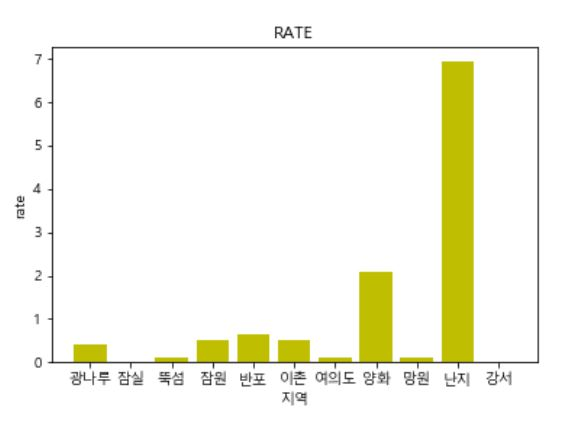

양화와 난지 지역의 경우는 한강공원이 sns 상에서 언급되는데 큰 영향력이 있음을 알 수 있다. 다른 지역들은 이에 비해 rate값이 1이하에서 비슷하게 분포하고 있다.

### (6) 결론

특화공원의 유무와 한강공원 전체 이용객 및 sns 게시물 수가 보이는 양상이 비슷하게 나타난다. 하지만 이것이 특화공원 유무 자체로 기인한 것인지에 대해 확실한 증거는 없는 것으로 나타난다. 또한 한강공원이 sns 언급 자체가 지역 홍보에 영향력이 있는가에 대해 확실한 결과가 나오지 않아서 이를 전제로 삼기가 어려웠다.

즉, 특화공원의 유무는 지역의 한강공원 전체 이용객과 sns게시물 수와 비슷한 데이터 분포를 보이지만 이것이 정확한 원인으로 보기 위해서는 더 많은 자료가 있거나 다른 방식의 조사가 필요하다.

### (7) 참고문헌 

서울시 열린 데이터 광장 : http://data.seoul.go.kr/

인스타 태그 크롤링- 
https://github.com/rangyu/TIL/blob/master/python/파이썬-Selenium으로-웹-크롤링하기.md

Instagram : https://www.instagram.com/developer/libraries/

Pandas : https://pandas.pydata.org/ 

오픈 API를 통한 공공데이터 수집
https://medium.com/@whj2013123218/%EC%98%A4%ED%94%88-api%EB%A5%BC-%ED%86%B5%ED%95%9C-%EA%B3%B5%EA%B3%B5%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%88%98%EC%A7%91-e1dd0ad203b6

### (8) 별첨1: (3)의 획득한 데이터 원본

http://openapi.seoul.go.kr:8088/616b50587073696d35334b756e7871/xml/octastatapi10798/1/20/

<?xml version="1.0" encoding="ISO-8859-1"?>
<octastatapi10798>
<list_total_count>12</list_total_count>
<RESULT>
<CODE>INFO-000</CODE>
<MESSAGE>정상 처리되었습니다</MESSAGE>
</RESULT>
<row>
<GIGAN>2016</GIGAN>
<GUBUN>합계</GUBUN>
<HAPGYE>69578410</HAPGYE>
<ILBANIYONGJA>24815265</ILBANIYONGJA>
<UNDONGSISEOL>7038573</UNDONGSISEOL>
<JAJEONGEO>15820373</JAJEONGEO>
<JUYOHAENGSA_MIT_MARATON>2899788</JUYOHAENGSA_MIT_MARATON>
<TEUKHWAGONGWON>16530149</TEUKHWAGONGWON>
<GITA>2474262</GITA>
</row>
<row>
<GIGAN>2016</GIGAN>
<GUBUN>광나루</GUBUN>
<HAPGYE>4031030</HAPGYE>
<ILBANIYONGJA>1216945</ILBANIYONGJA>
<UNDONGSISEOL>855008</UNDONGSISEOL>
<JAJEONGEO>1853805</JAJEONGEO>
<JUYOHAENGSA_MIT_MARATON>54219</JUYOHAENGSA_MIT_MARATON>
<TEUKHWAGONGWON>-</TEUKHWAGONGWON>
<GITA>51053</GITA>
</row>
<row>
<GIGAN>2016</GIGAN>
<GUBUN>잠실</GUBUN>
<HAPGYE>3842863</HAPGYE>
<ILBANIYONGJA>1506884</ILBANIYONGJA>
<UNDONGSISEOL>708982</UNDONGSISEOL>
<JAJEONGEO>1351486</JAJEONGEO>
<JUYOHAENGSA_MIT_MARATON>58884</JUYOHAENGSA_MIT_MARATON>
<TEUKHWAGONGWON>-</TEUKHWAGONGWON>
<GITA>216627</GITA>
</row>
<row>
<GIGAN>2016</GIGAN>
<GUBUN>뚝섬</GUBUN>
<HAPGYE>15199482</HAPGYE>
<ILBANIYONGJA>6358262</ILBANIYONGJA>
<UNDONGSISEOL>1423161</UNDONGSISEOL>
<JAJEONGEO>3468904</JAJEONGEO>
<JUYOHAENGSA_MIT_MARATON>342133</JUYOHAENGSA_MIT_MARATON>
<TEUKHWAGONGWON>3072471</TEUKHWAGONGWON>
<GITA>534551</GITA>
</row>
<row>
<GIGAN>2016</GIGAN>
<GUBUN>잠원</GUBUN>
<HAPGYE>3661004</HAPGYE>
<ILBANIYONGJA>1567248</ILBANIYONGJA>
<UNDONGSISEOL>634009</UNDONGSISEOL>
<JAJEONGEO>1299316</JAJEONGEO>
<JUYOHAENGSA_MIT_MARATON>11053</JUYOHAENGSA_MIT_MARATON>
<TEUKHWAGONGWON>-</TEUKHWAGONGWON>
<GITA>149378</GITA>
</row>
<row>
<GIGAN>2016</GIGAN>
<GUBUN>반포</GUBUN>
<HAPGYE>6717628</HAPGYE>
<ILBANIYONGJA>2093502</ILBANIYONGJA>
<UNDONGSISEOL>735681</UNDONGSISEOL>
<JAJEONGEO>1293867</JAJEONGEO>
<JUYOHAENGSA_MIT_MARATON>173798</JUYOHAENGSA_MIT_MARATON>
<TEUKHWAGONGWON>2336752</TEUKHWAGONGWON>
<GITA>84028</GITA>
</row>
<row>
<GIGAN>2016</GIGAN>
<GUBUN>이촌</GUBUN>
<HAPGYE>3802442</HAPGYE>
<ILBANIYONGJA>1674408</ILBANIYONGJA>
<UNDONGSISEOL>687320</UNDONGSISEOL>
<JAJEONGEO>977715</JAJEONGEO>
<JUYOHAENGSA_MIT_MARATON>328160</JUYOHAENGSA_MIT_MARATON>
<TEUKHWAGONGWON>-</TEUKHWAGONGWON>
<GITA>134839</GITA>
</row>
<row>
<GIGAN>2016</GIGAN>
<GUBUN>여의도</GUBUN>
<HAPGYE>16716291</HAPGYE>
<ILBANIYONGJA>4000522</ILBANIYONGJA>
<UNDONGSISEOL>79925</UNDONGSISEOL>
<JAJEONGEO>830408</JAJEONGEO>
<JUYOHAENGSA_MIT_MARATON>1389315</JUYOHAENGSA_MIT_MARATON>
<TEUKHWAGONGWON>9571634</TEUKHWAGONGWON>
<GITA>844487</GITA>
</row>
<row>
<GIGAN>2016</GIGAN>
<GUBUN>양화</GUBUN>
<HAPGYE>3434094</HAPGYE>
<ILBANIYONGJA>1485713</ILBANIYONGJA>
<UNDONGSISEOL>555750</UNDONGSISEOL>
<JAJEONGEO>1332760</JAJEONGEO>
<JUYOHAENGSA_MIT_MARATON>11622</JUYOHAENGSA_MIT_MARATON>
<TEUKHWAGONGWON>-</TEUKHWAGONGWON>
<GITA>48249</GITA>
</row>
<row>
<GIGAN>2016</GIGAN>
<GUBUN>망원</GUBUN>
<HAPGYE>3202976</HAPGYE>
<ILBANIYONGJA>1514059</ILBANIYONGJA>
<UNDONGSISEOL>567880</UNDONGSISEOL>
<JAJEONGEO>942925</JAJEONGEO>
<JUYOHAENGSA_MIT_MARATON>56195</JUYOHAENGSA_MIT_MARATON>
<TEUKHWAGONGWON>-</TEUKHWAGONGWON>
<GITA>121917</GITA>
</row>
<row>
<GIGAN>2016</GIGAN>
<GUBUN>난지</GUBUN>
<HAPGYE>6050468</HAPGYE>
<ILBANIYONGJA>2396163</ILBANIYONGJA>
<UNDONGSISEOL>244423</UNDONGSISEOL>
<JAJEONGEO>1118615</JAJEONGEO>
<JUYOHAENGSA_MIT_MARATON>457718</JUYOHAENGSA_MIT_MARATON>
<TEUKHWAGONGWON>1549292</TEUKHWAGONGWON>
<GITA>284257</GITA>
</row>
<row>
<GIGAN>2016</GIGAN>
<GUBUN>강서</GUBUN>
<HAPGYE>2920132</HAPGYE>
<ILBANIYONGJA>1001559</ILBANIYONGJA>
<UNDONGSISEOL>546434</UNDONGSISEOL>
<JAJEONGEO>1350572</JAJEONGEO>
<JUYOHAENGSA_MIT_MARATON>16691</JUYOHAENGSA_MIT_MARATON>
<TEUKHWAGONGWON>-</TEUKHWAGONGWON>
<GITA>4876</GITA>
</row>
</octastatapi10798>

### (9) 별첨2: (4)의 가공된 데이터 원본

[17812, 2450863, 278772, 47985, 260660, 41852, 1765892, 2933, 237613, 11760, 100714],
[7344, 29784, 32416, 23853, 170635, 20910, 194306, 6106, 26806, 81344, 1598]

[0.4123063103525713, 0.012152454053939367, 0.11628140559310117, 0.4970928415129728, 0.654626716795826, 0.49961770046831694, 0.1100327766363968, 2.0818274803954995, 0.1128136928535055, 6.9170068027210885, 0.01586671167861469]

### (10) 별첨3: (3)을 (4)로 변환하는 등의 작업을 위하여 본인이 직접 개발한 Python 소스코드 원본

#### 전체 이용객 현황

In [ ]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

%matplotlib inline
from matplotlib import pyplot as plt

X_axis = gubun_list[1:12]
Y_axis = [4031030,3842863,15199482, 3661004, 6717628, 3802442, 16716291, 3434094, 3202976, 6050468, 2920132]

xs = [i for i, _ in enumerate(Y_axis)]
plt.xticks([i for i, _ in enumerate(X_axis)], X_axis)

plt.bar(xs, Y_axis,  color='b')

plt.title("전체 이용객 현황")
plt.xlabel('지역')
plt.ylabel('이용객')

plt.show()

#### 해시태그 게시물 수 현황

In [ ]:
local_list = [17812, 2450863, 278772, 47985, 260660, 41852, 1765892, 2933, 237613, 11760, 100714]
local_plus_list = [7344, 29784, 32416, 23853, 170635, 20910, 194306, 6106, 26806, 81344, 1598]

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

%matplotlib inline
from matplotlib import pyplot as plt

X_axis = gubun_list[1:12]
Y_axis1 = [17812, 2450863, 278772, 47985, 260660, 41852, 1765892, 2933, 237613, 11760, 100714]
Y_axis2 = [7344, 29784, 32416, 23853, 170635, 20910, 194306, 6106, 26806, 81344, 1598]

xs1 = [i for i, _ in enumerate(Y_axis1)]
xs2 = [i for i, _ in enumerate(Y_axis2)]

#그래프 1
plt.xticks([i for i, _ in enumerate(X_axis)], X_axis)
plt.bar(xs1, Y_axis1,  color='g')

plt.title("지역명 해시태그(#)만 붙였을때")
plt.xlabel('지역')
plt.ylabel('HASHTAG')

plt.show()

#그래프 2
plt.xticks([i for i, _ in enumerate(X_axis)], X_axis)
plt.bar(xs2, Y_axis2,  color='g')

plt.title("\"한강공원\"해시태그(#)를 붙였을때")
plt.xlabel('지역')
plt.ylabel('HASHTAG')

plt.show()

#### rate 식 도출

[0.4123063103525713, 0.012152454053939367, 0.11628140559310117, 0.4970928415129728, 0.654626716795826, 0.49961770046831694, 0.1100327766363968, 2.0818274803954995, 0.1128136928535055, 6.9170068027210885, 0.01586671167861469]


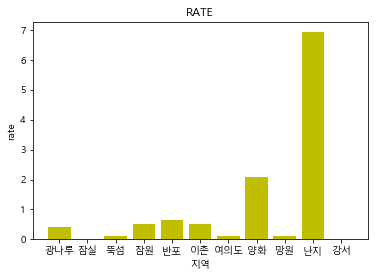

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

gubun_list = []     

url='http://openapi.seoul.go.kr:8088/616b50587073696d35334b756e7871/xml/octastatapi10798/1/20/'
#인증키 url
req = requests.get(url)
html = req.text
soup = BeautifulSoup(html, 'html.parser')
    
#구분(지역명) 리스트 만들기
gubun = soup.find_all('gubun')   
    
for code in gubun:
    gubun_list.append(code.text)

#해시태그 게시물 수
local_list = [17812, 2450863, 278772, 47985, 260660, 41852, 1765892, 2933, 237613, 11760, 100714]
local_plus_list = [7344, 29784, 32416, 23853, 170635, 20910, 194306, 6106, 26806, 81344, 1598]
rate_list = []

#rate 식
for i in range(11):
    rate = (local_plus_list[i]/local_list[i]) # 퍼센트(%) 정수로 저장
    rate_list.append(rate)
    
print(rate_list)

#한글폰트
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

#그래프
%matplotlib inline
from matplotlib import pyplot as plt

X_axis = gubun_list[1:12]
Y_axis = rate_list

xs = [i for i, _ in enumerate(Y_axis)]
plt.xticks([i for i, _ in enumerate(X_axis)], X_axis)


plt.bar(xs, Y_axis,  color='y')

plt.title("RATE")
plt.xlabel('지역')
plt.ylabel('rate')

plt.show()